# Milestone 1 - Data Visualization Complementary Views 

## Author - Student name



## Instructions
1. Create different complementary views of data by applying multiple chart types and aesthetics.
2. Project multiple dimensions using conditioning or faceting (e.g. small multiples) on both categorical and numeric variables.

In [71]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [172]:
# Load dataset
filename = 'https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/JitteredHeadCount.csv'
headcount_df = pd.read_csv(filename)
headcount_df.info() #information about dataset (columns, datatypes, count non-null objects in each column)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175677 entries, 0 to 175676
Data columns (total 9 columns):
GameCode        175677 non-null object
DateFormat      175677 non-null object
Hour            175677 non-null int64
TablesOcc       175677 non-null int64
TablesOpen      175677 non-null int64
TablesClosed    175677 non-null int64
HeadCount       175677 non-null int64
DayOfWeek       175677 non-null int64
DayNumber       175677 non-null int64
dtypes: int64(7), object(2)
memory usage: 12.1+ MB


In [178]:
headcount_df.shape #dataset consists of 9 column and has 175677 rows

(175677, 9)

## Jittered Head Count information

Dataset contains following data:

* <i><b> GameCode </b></i>: 2-digit game code.
* <i><b> DateFormat </b></i>: Date
* <i><b> Hour </b></i>: 0-23 
* <i><b> TabelsOcc </b></i>:  Number of Tables Occupied in the casino
* <i><b> TablesOpen </b></i>: Number of tables open in the casino. 
* <i><b> Tables Closed </b></i>: Number of tables closed in the casino.
* <i><b> HeadCount </b></i>: Total Count of people at the hour, day, and table type
* <i><b> DayOfWeek </b></i>: 1-7.  1 = Monday, 7 = Sunday.
* <i><b> DayNumber 1-366 </b></i>:  Day of year. 

In [73]:
#Elementary cleaning up of dataset
#Deleting missing data
headcount_df = headcount_df.replace(to_replace=" ?", value=np.nan)
headcount_df.dropna(axis = 0, inplace = True)

In [154]:
#convert date to datetime format
headcount_df.loc[:, 'DateFormat'] = pd.to_datetime(headcount_df.loc[:, 'DateFormat'])
headcount_df.dtypes

GameCode                object
DateFormat      datetime64[ns]
Hour                     int64
TablesOcc                int64
TablesOpen               int64
TablesClosed             int64
HeadCount                int64
DayOfWeek                int64
DayNumber                int64
median                 float64
dtype: object

Columns (exept GameCode and DateFormat) have numeric format, so it isn't necessary to convert them to numeric.

In [76]:
#Check possible values of GameCode
headcount_df['GameCode'].value_counts()
#22 distinct values

WR    8778
CR    8778
MR    8778
UT    8778
ND    8778
C4    8778
RO    8778
S6    8778
PG    8778
SH    8778
TL    8778
TH    8778
RR    8778
FP    8778
LI    8778
TP    8778
DH    8778
MQ    8778
PA    8778
MI    8630
MS     147
BA     118
Name: GameCode, dtype: int64

#### Bar plot of mean value of HeadCount by GameCode ####

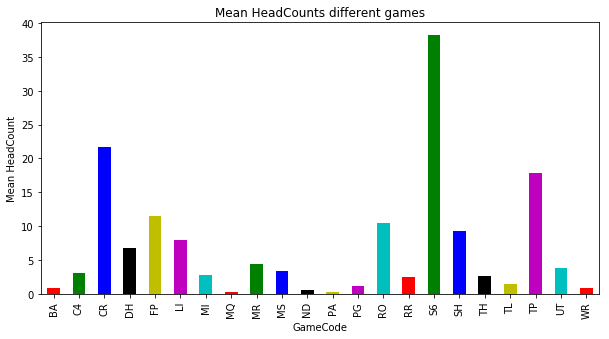

In [145]:
ax = plt.figure(figsize=(10, 5)).gca() # define axis
my_colors = 'rgbkymc' #colors for identification separate Game Codes  (red, green, blue,black, yellow, magenta, cyan-blue )
headcount_df['HeadCount'].groupby(headcount_df['GameCode']).mean().plot.bar(ax = ax, color = my_colors)#bar plot
ax.set_ylabel('Mean HeadCount') #set plot labels
ax.set_title('Mean HeadCounts different games') #set plot title
plt.show()

1. Game S6 has a highest mean HeadCount
2. Games PA, MQ, ND have a lowest mean HeadCount

In [ ]:
#### Bar plot of max value of HeadCount by GameCode ####

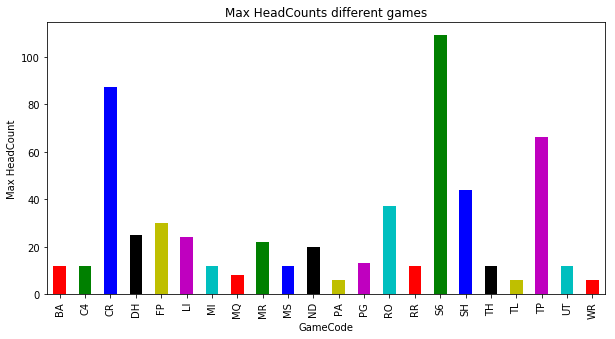

In [103]:
ax = plt.figure(figsize=(10, 5)).gca() # define axis
headcount_df['HeadCount'].groupby(headcount_df['GameCode']).max().plot.bar(ax = ax, color = my_colors) #plot
ax.set_ylabel('Max HeadCount') #set plot label
ax.set_title('Max HeadCounts different games') #set plot title
plt.show()

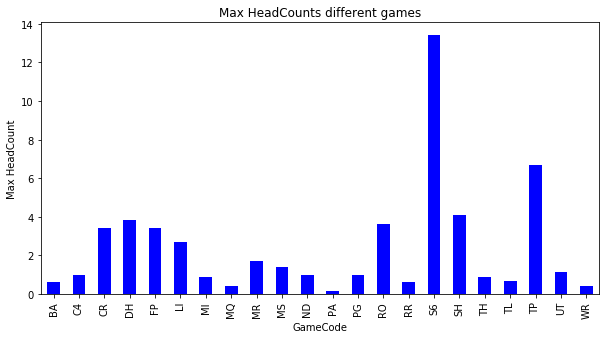

In [179]:
ax = plt.figure(figsize=(10, 5)).gca() # define axis
headcount_df['TablesOcc'].groupby(headcount_df['GameCode']).mean().plot.bar(ax = ax, color = 'red') #plot
headcount_df['TablesOpen'].groupby(headcount_df['GameCode']).mean().plot.bar(ax = ax, color = 'blue') #plot
ax.set_ylabel('Max HeadCount') #set plot label
ax.set_title('Max HeadCounts different games') #set plot title
plt.show()

1. Game S6 has a highest max HeadCount
2. Games PA, MQ, ND have a lowest max HeadCount

In [ ]:
#### Bar plot of mean value of OpenTables by GameCode ####

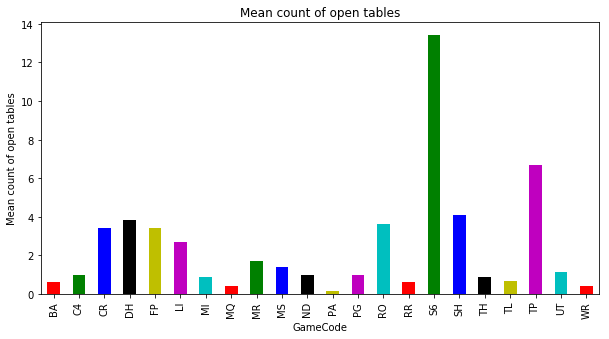

In [147]:
ax = plt.figure(figsize=(10, 5)).gca() # define axis
headcount_df['TablesOpen'].groupby(headcount_df['GameCode']).mean().plot.bar(ax = ax, color = my_colors)
ax.set_ylabel('Mean count of open tables')
ax.set_title('Mean count of open tables')
plt.show()

1. Game S6 has a highest mean count of OpenTables
2. Games PA, MQ, ND have a lowest mean count of OpenTables

In [ ]:
#### Bar plot of max value of OpenTables by GameCode ####

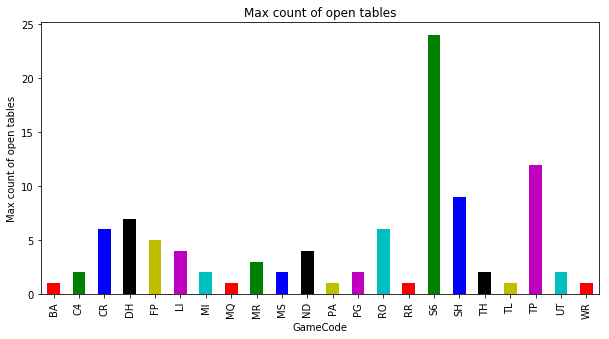

In [149]:
ax = plt.figure(figsize=(10, 5)).gca() # define axis
headcount_df['TablesOpen'].groupby(headcount_df['GameCode']).max().plot.bar(ax = ax, color = my_colors)  #plot
ax.set_ylabel('Max count of open tables')  #set plot label
ax.set_title('Max count of open tables')  #set plot title
plt.show()

1. Game S6 has a highest max count of OpenTables
2. Games PA, MQ, ND have a lowest max counts of OpenTables

#### Correlation matrix for dataset parameters ####

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5]),
 <a list of 8 Text xticklabel objects>)

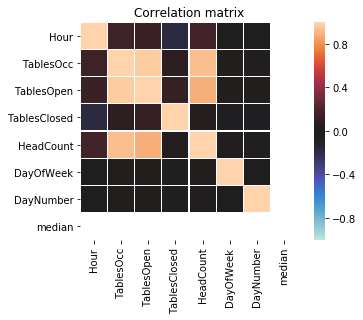

In [150]:
headcount_corr = headcount_df.corr() #count dataset correlation coefficients
sns.heatmap(headcount_corr, vmax=1, center=0, vmin=-1,
            square=True, linewidths=.25, cbar_kws={"shrink": 1})  #show correlation heatmap
plt.title('Correlation matrix')  #set plot title
plt.yticks(rotation='horizontal')
plt.xticks(rotation='vertical')

According data correlation heatmap:
1. There is a strong correlation between variables:
* TablesOcc & TablesOpen
* HeadCount & TablesOpen
* HeadCount & TablesOcc

2. There is a no correlation between variables:
* Hour & TablesOcc
* Hour & TablesOpen
* Hour & HeadCount
* Hour & DayOf Week
* TablesOcc & TablesClosed
* HeadCount & TablesOpen
* HeadCount & TablesOcc

#### Facet plot TablesOpen vs HeadCount by GameCode and DayOfWeek

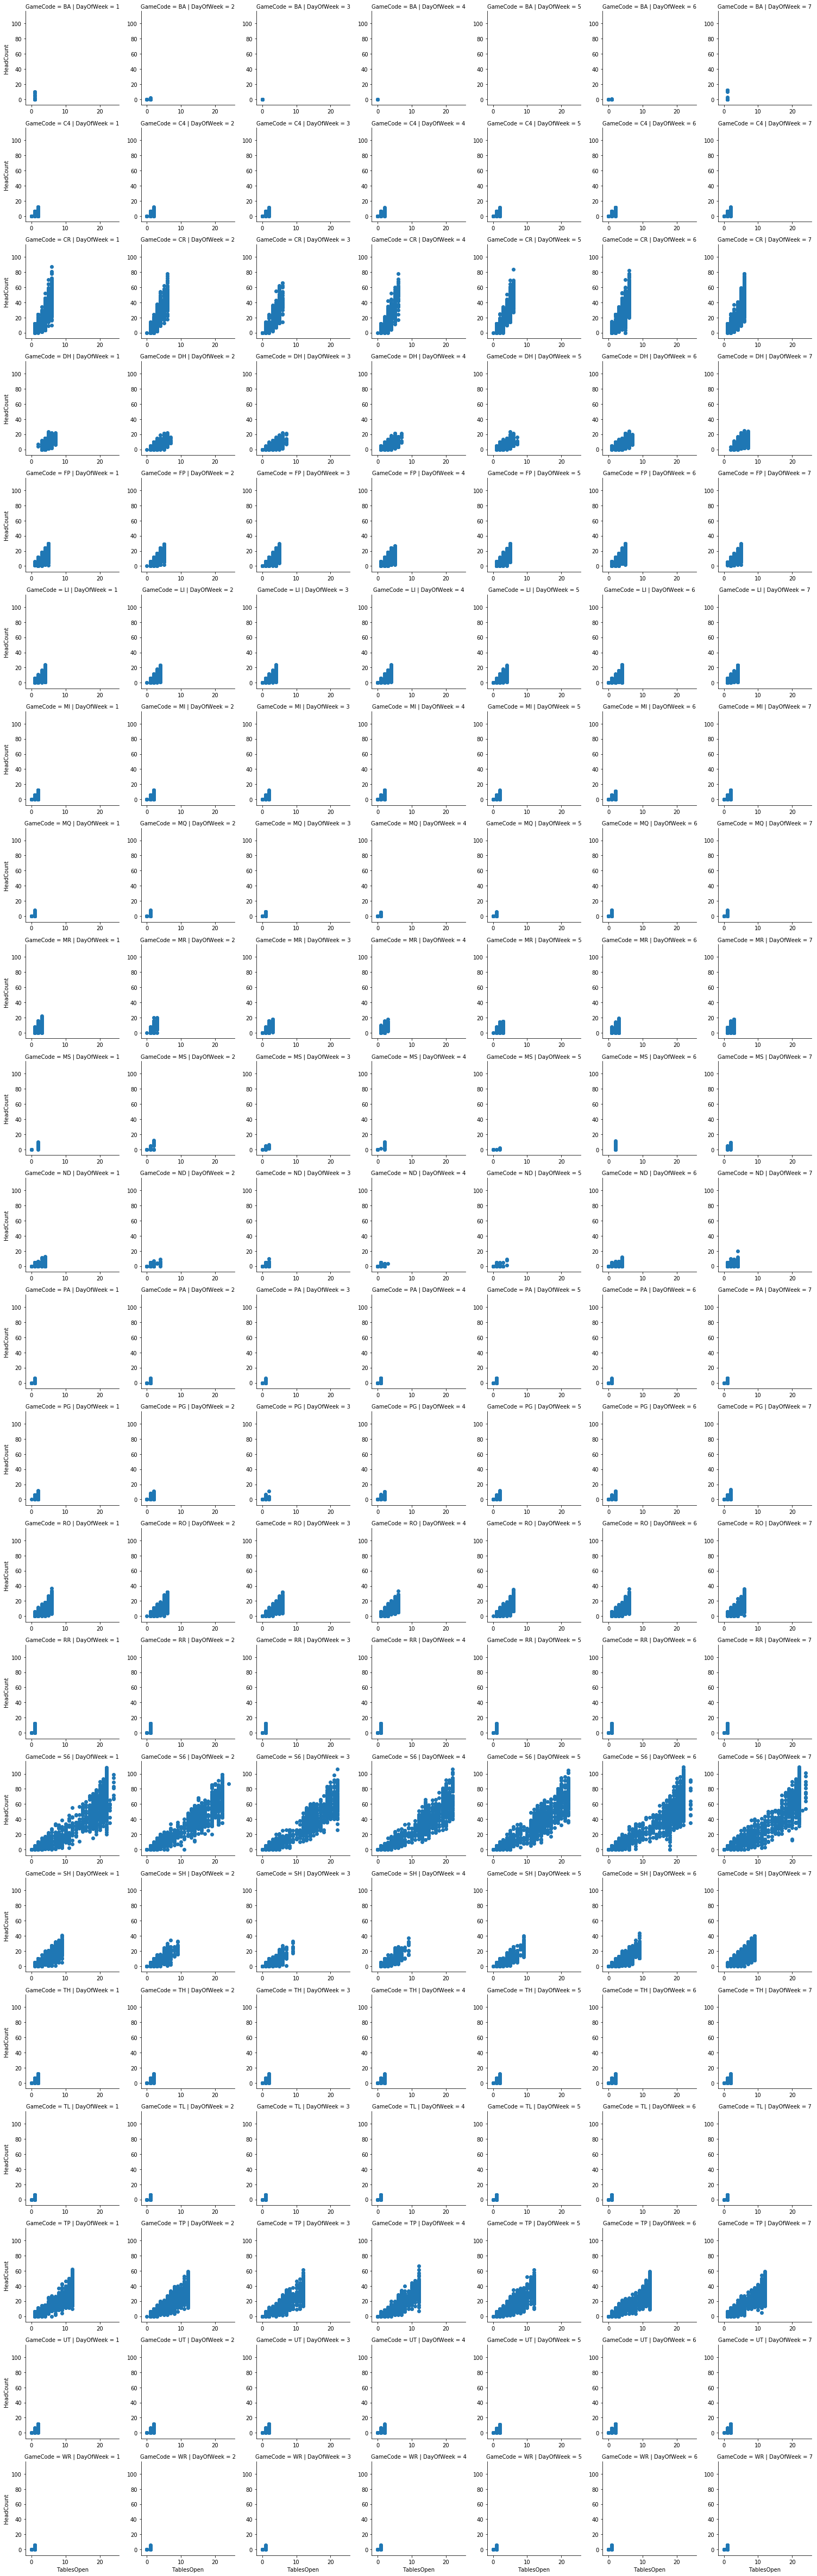

In [109]:
g = sns.FacetGrid(headcount_df, 
                  col = "DayOfWeek",
                  row="GameCode", 
                  palette="Set1") #set parameters
g = g.map(plt.scatter, "TablesOpen", "HeadCount")  #show plot

1. Game BA wasn't presented on Fridays at all.
2. For other games aren't sufficient difference for distribution by DayOfWeek, count of TablesOpen and HeadCount seems almost equal.
3. Common tendency: the more tables are open, the higher is HeadCount (and it's predictable, the more tables are open, the more people could take part in a game). 

#### Timeline plot of mean HeadCount value #### 

Text(0.5,1,'Mean HeadCount')

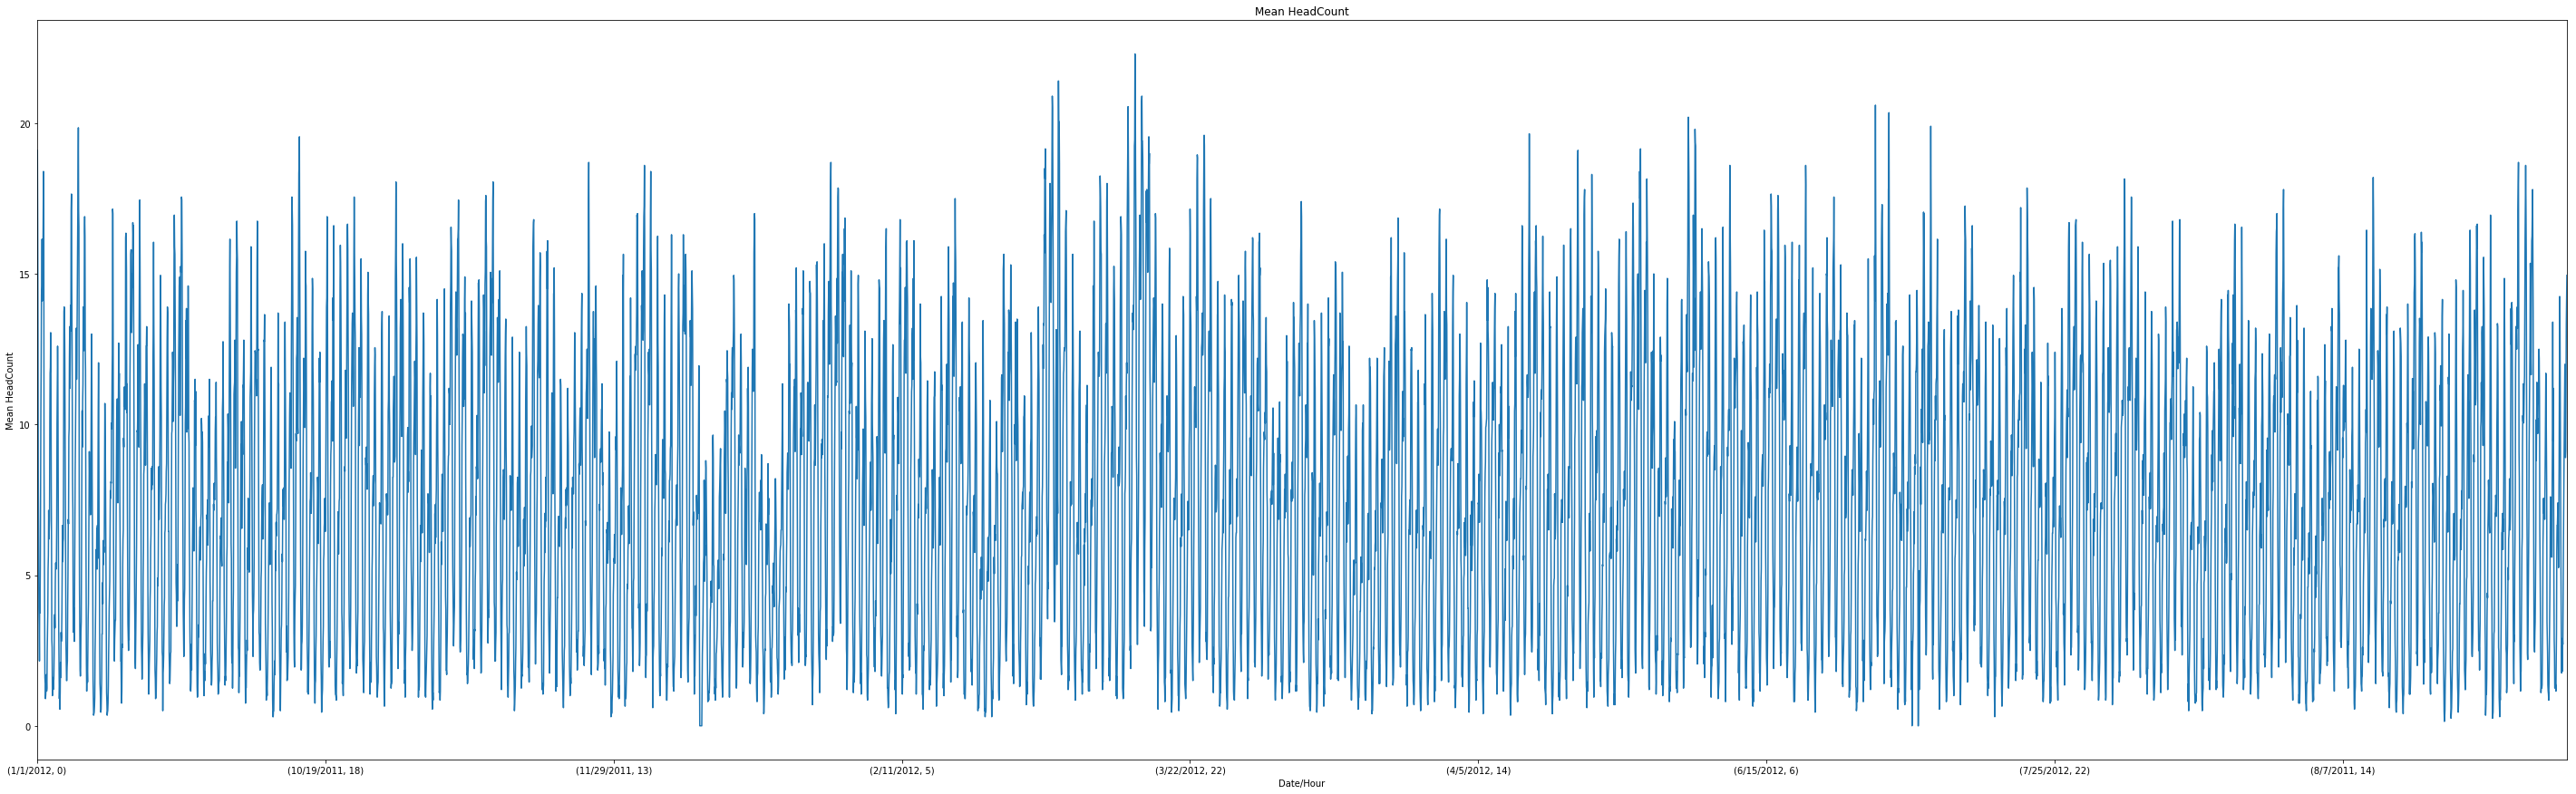

In [173]:
ax = plt.figure(figsize=(50, 15)).gca() # define axis
a = headcount_df.groupby(['DateFormat', 'Hour']).apply(np.mean) #count mean HeadCount using data, previously grouped by date and hour
a['HeadCount'].plot(ax=ax)
ax.set_xlabel('Date/Hour')  #set plot x-label
ax.set_ylabel('Mean HeadCount')  #set plot y-label
ax.set_title('Mean HeadCount')  #set plot title

We can notice some periodicity on the plot.

#### Scatter plot TablesOpen vs Hour ####

Text(0.5,0,'Hour')

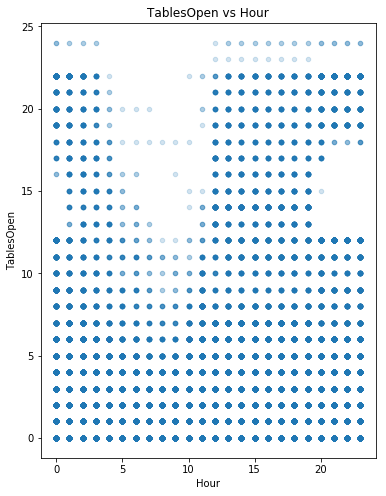

In [159]:
%matplotlib inline
import matplotlib.pyplot as plt
ax = plt.figure(figsize=(6, 8)).gca() # define axis
headcount_df.plot.scatter(x = 'Hour', y = 'TablesOpen', ax = ax, alpha = 0.2)

ax.set_title('TablesOpen vs Hour') # Give the plot a main title
ax.set_ylabel('TablesOpen')# Set text for y axis
ax.set_xlabel('Hour')

1. Between 5 am and 10 am there is the least amount of OpenTables.
2. In any other hour of the day amounts of OpenTables are pretty equal.

#### Scatter plot TablesClosed vs Hour ####

Text(0.5,0,'Hour')

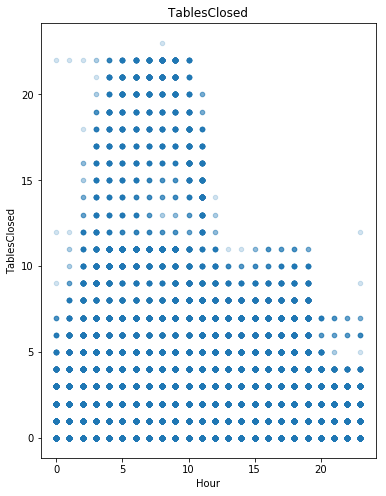

In [157]:
%matplotlib inline
import matplotlib.pyplot as plt
ax = plt.figure(figsize=(6, 8)).gca() # define axis
headcount_df.plot.scatter(x = 'Hour', y = 'TablesClosed', ax = ax, alpha = 0.2) #plot

ax.set_title('TablesClosed')# Set text for y axis
ax.set_xlabel('Hour') 

1. Between 1 am and 10 am there is the biggest amounts of ClosedTables.
2. The less amount of ClosedTables is presented between 6 pm and 12 am.

#### Facet HeadCount histogram by GameCode

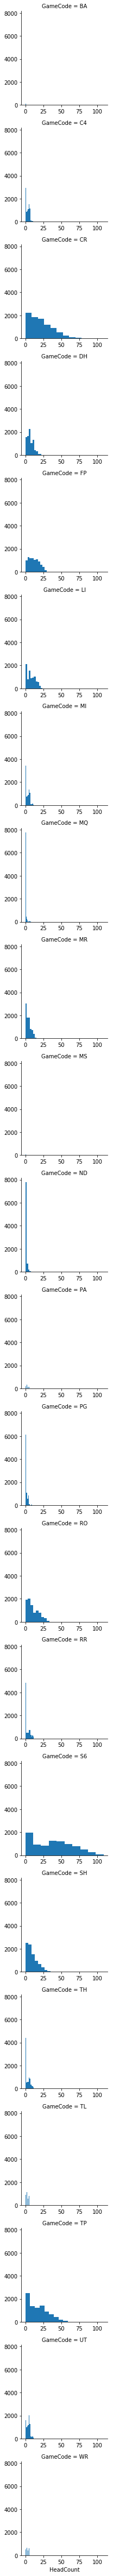

In [169]:
gr = sns.FacetGrid(headcount_df, row="GameCode") 
gr = gr.map(plt.hist, "HeadCount") #show plot

1. For games MR, PA, RO, S6 HeadCount value = 0 is the most popular, and significantly exceeds any other value.
2. Games DH and SH tend to have higher level of HeadCount in general.

#### Facet TablesOccupied histogram by GameCode ####

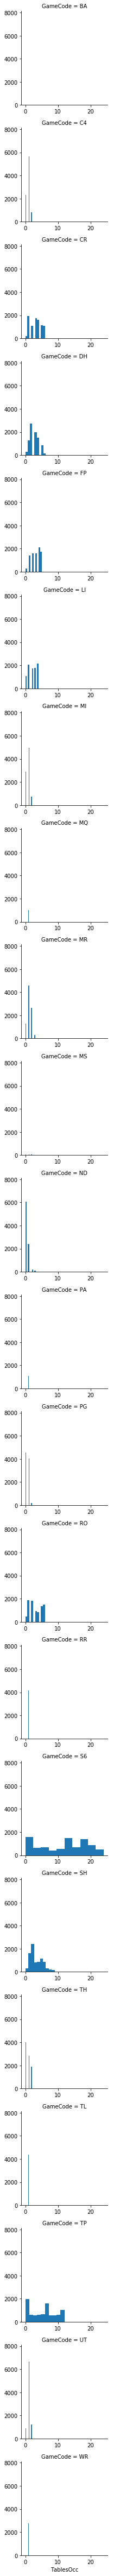

In [166]:
gr = sns.FacetGrid(headcount_df, row="GameCode")
gr = gr.map(plt.hist, "TablesOcc")  #show plot

If to compare with previous plot, we can notice correlation between Tables Occupied and HeadCount.
Games that have a least HeadCount, also have least Tables Occupied count (for instance, PA, RO) and vice versa.

#### Plot TablesOpen vs Hour with DayOfWeek and with HeadCount as marker size ####

Text(0.5,1,'TablesOpen vs Hour \n with DayOfWeek \n with HeadCount as marker size')

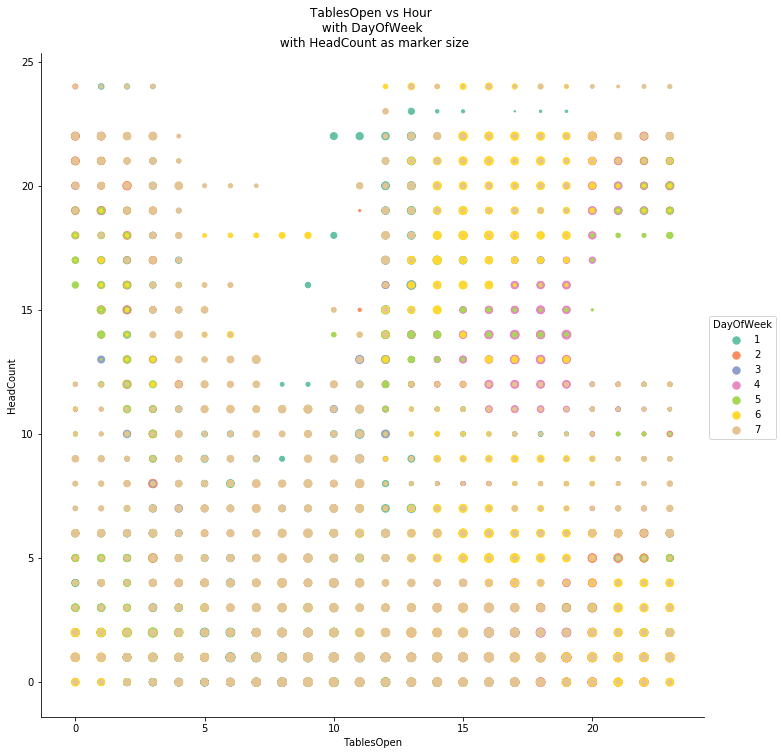

In [176]:
sns.lmplot(x = 'Hour', y = 'TablesOpen', 
           data = headcount_df, 
           hue = "DayOfWeek", 
           palette="Set2", 
           scatter_kws={'alpha':1, 
                        's': headcount_df.loc[:, 'HeadCount']},
           fit_reg = False, size = 10)  #set params, show plot
plt.xlabel('TablesOpen') 
plt.ylabel('HeadCount')
plt.title('TablesOpen vs Hour \n with DayOfWeek \n with HeadCount as marker size')

#### Plot HeadCount vs TableOpen with GameCode and with count of TablesOcc as marker size ####

Text(0.5,1,'HeadCount vs TableOpen \n with GameCode \n with count of TablesOcc as marker size')

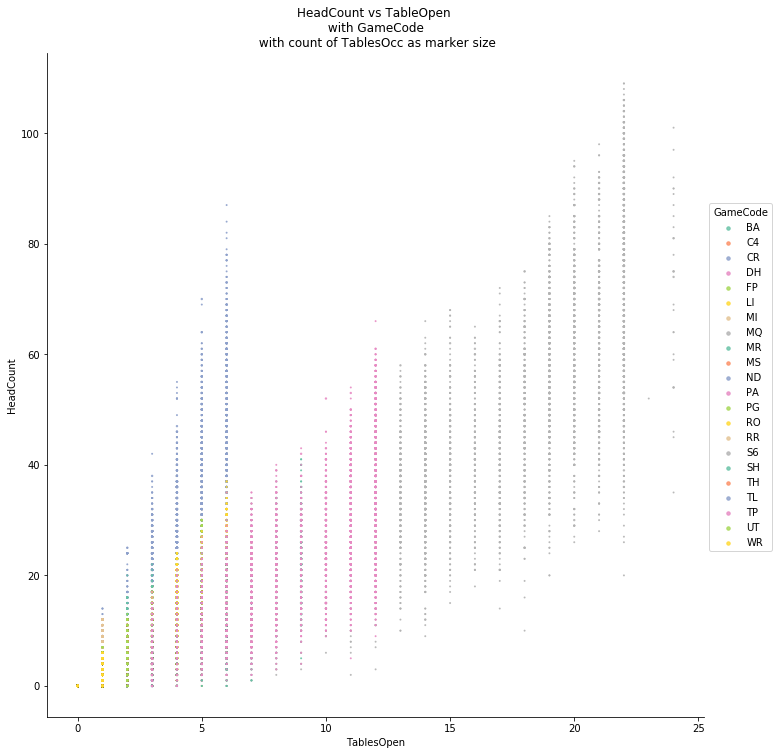

In [177]:
sns.lmplot(x = 'TablesOpen', y = 'HeadCount', 
           data = headcount_df, 
           hue = "GameCode", 
           palette="Set2", 
           scatter_kws={'s': headcount_df.loc[:, 'TablesOcc']},
           fit_reg = False, size=10) #set parameters, show plot
plt.xlabel('TablesOpen') #label for x-axis
plt.ylabel('HeadCount')  #label for y-axis
plt.title('HeadCount vs TableOpen \n with GameCode \n with count of TablesOcc as marker size')

1. The highest HeadCount with low amount TablesOpen has game CR.
2. The biggest dispertion in TablesOpen and HeadCount has game S6.


## Summary ##

1. In this Milestone was analyzed HeadCount dataset.
2. Elementary data cleaning-up was performed.
3. Was shown different plots presented interesting relationship between data:
    * Bar plots (max and mean Headcount by GameCode, max and mean TableOpen by GameCode)
    * Correlation matrix
    * Facet plot TablesOpen vs HeadCount by GameCode and DayOfWeek
    * Timeline plot of mean HeadCount value
    * Scatter plot TablesClosed vs Hour
    * Facet HeadCount histogram by GameCode
    * Facet TablesOccupied histogram by GameCode
    * Plot TablesOpen vs Hour with DayOfWeek and with HeadCount as marker size
    * Plot HeadCount vs TableOpen with GameCode and with count of TablesOcc as marker size.
    

4. Some conclusions were made.

5. Main goal of this assignment is ability to create different views of data in readable and understandable format.
In my opinion, last two plots shows, that using extra-dimensions makes plots difficult to understand.


